In [1]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


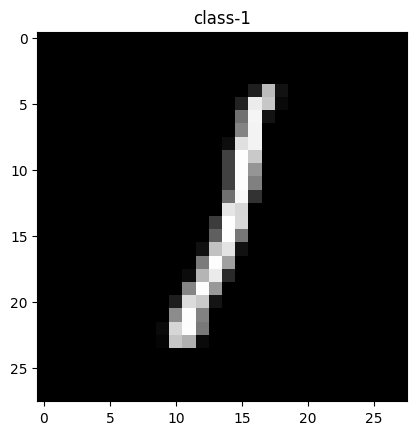

Train image 4524-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31 187
   18   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  34 236 199
    9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 112 245  19
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 131 243   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = 'C:/Users/hp/Desktop/KNN/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])

# Extract 20% data from the training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [3]:
# Your validation set extraction script/code 
train_image_N,validation_image = np.split(train_images,[int(0.80 * len(train_images))])
train_label_N,validation_label= np.split(train_labels,[int(0.80 * len(train_images))])

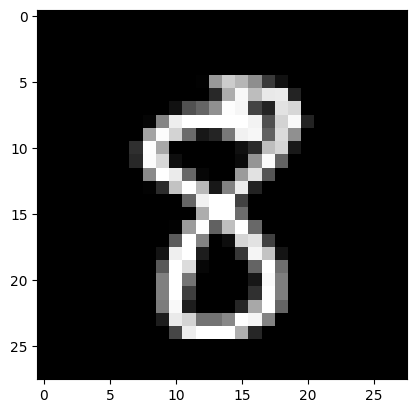

8

In [4]:
plt.imshow(train_image_N[46], cmap = 'gray')
plt.show()
train_label_N[46]

# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [44]:
!pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 354.6 kB/s eta 0:00:00
     -------------------------------------- 42.5/42.5 MB 439.0 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 471.7 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Your k-NN algorithm script/code 
import pandas as pd

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

In [6]:
import sklearn.metrics

In [7]:
def EuclideanDistance(x, y):
    return np.sqrt(np.dot(x,x.T) - 2 * np.dot(x, y.T) + np.dot(y, y.T))

#def ManhattanDistance(img1, img2):
#    return np.abs(np.array(img1)-np.array(img2)).sum()

#def ChebyshevDistance(img1, img2):
#    return np.max(np.abs(np.array(img1)-np.array(img2))) 

In [8]:
tr_dataset = train_image_N.reshape(48000, 28*28)

vd_dataset = validation_image.reshape(12000, 28*28)

te_dataset = test_images.reshape(10000, 28*28)

In [9]:
def sorted_labels(Dist, TrainLabels):
    
    Sorted_labels = [0]*Sample_size
    
    for i in range(Dist.shape[0]):
        
        dist_all = Dist[i]
        sorted_indices = np.argsort(dist_all)
        labels = TrainLabels[sorted_indices]
        
        Sorted_labels[i] = labels
        
        print(i)
        
    return Sorted_labels    

In [10]:
def knl(Labels, k):
    
    Predicted_Labels = [0]*Sample_size
    
    for i in range(Sample_size):
    
        labels = Labels[i].flatten()
        
        labels = np.array(list(map(int, labels)))
        k_labels = labels[0:k]
                
        max_freq_label = np.bincount(k_labels).argmax()

        Predicted_Labels[i] = max_freq_label
        
    return Predicted_Labels

In [11]:
def accuracy(Label_1, Label_2):
    loss = 0
    for i in range(len(Label_1)):
        if Label_1[i] == Label_2[i]:
            loss += 0
        else :
            loss += 1
        acc = 1 - (loss/len(Label_1))
    return acc*100

In [12]:
col_index = [i for i in range(784)]
row_index = [i for i in range(48000)]

Train_df = pd.DataFrame(tr_dataset, columns = col_index, index = row_index)
Train_np = Train_df.to_numpy()

In [13]:
k_values = list(range(1,26,2)) 
len(k_values)

Acc_List = [0]*len(k_values)

# Validation Dataset

In [14]:
Sample_size = 1000

In [15]:
Actual_Labels = validation_label[0:Sample_size]

In [16]:
col_index = [i for i in range(784)]
row_index = [i for i in range(Sample_size)]

Test_df = pd.DataFrame(vd_dataset[0:Sample_size], columns = col_index, index = row_index)
Test_np = Test_df.to_numpy()

print(Test_np.shape)
print(Train_np.shape)

(1000, 784)
(48000, 784)


### Euclidean Distance

In [17]:
Distance_E = euclidean_distances(Test_np, Train_np)
Distance_E.shape

(1000, 48000)

In [18]:
col_index = index = [i for i in range(48000)]
Dist_E_df = pd.DataFrame(Distance_E, columns = col_index)
Dist_E_np = Dist_E_df.to_numpy()

In [19]:
PredLabels_E = sorted_labels(Dist_E_np, train_labels) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
PredLabels_E

[array([4, 4, 4, ..., 8, 0, 0], dtype=uint8),
 array([7, 7, 7, ..., 0, 8, 0], dtype=uint8),
 array([3, 8, 8, ..., 0, 0, 0], dtype=uint8),
 array([8, 8, 8, ..., 7, 9, 4], dtype=uint8),
 array([5, 5, 5, ..., 2, 0, 0], dtype=uint8),
 array([6, 6, 6, ..., 0, 0, 0], dtype=uint8),
 array([6, 6, 6, ..., 4, 4, 3], dtype=uint8),
 array([8, 8, 8, ..., 6, 6, 9], dtype=uint8),
 array([2, 2, 2, ..., 0, 0, 0], dtype=uint8),
 array([2, 2, 2, ..., 0, 5, 5], dtype=uint8),
 array([7, 7, 7, ..., 0, 2, 8], dtype=uint8),
 array([8, 8, 8, ..., 4, 9, 4], dtype=uint8),
 array([0, 0, 0, ..., 4, 3, 0], dtype=uint8),
 array([4, 4, 4, ..., 2, 3, 2], dtype=uint8),
 array([3, 3, 3, ..., 0, 0, 0], dtype=uint8),
 array([4, 4, 4, ..., 0, 0, 0], dtype=uint8),
 array([5, 5, 5, ..., 2, 2, 2], dtype=uint8),
 array([2, 2, 2, ..., 5, 5, 3], dtype=uint8),
 array([4, 4, 4, ..., 0, 0, 0], dtype=uint8),
 array([2, 2, 2, ..., 7, 5, 5], dtype=uint8),
 array([4, 9, 9, ..., 0, 0, 0], dtype=uint8),
 array([8, 8, 8, ..., 6, 4, 9], dt

In [21]:
count = 0

for i in k_values:
    
    Pred_labels = knl(PredLabels_E, i)
    acc = accuracy(Actual_Labels, Pred_labels)
    Acc_List[count] = acc
    count+=1

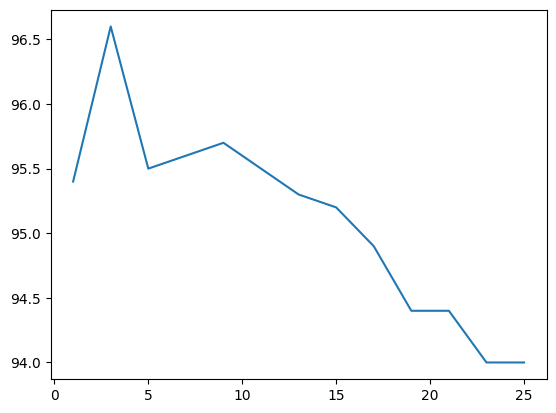

In [22]:
plt.plot(k_values,Acc_List)

In [23]:
max_acc_E = np.max(Acc_List)
opt_k_E = k_values[Acc_List.index(max_acc_E)]

print(f"The Optimized value of K is {opt_k_E}")
print(f"The Validation Accuracy is {max_acc_E}%")

The Optimized value of K is 3
The Validation Accuracy is 96.6%


### Manhattan Distance 

In [24]:
Distance_M = manhattan_distances(Test_np, Train_np)

In [25]:
col_index = index = [i for i in range(48000)]
Dist_M_df = pd.DataFrame(Distance_M, columns = col_index)
Dist_M_np = Dist_M_df.to_numpy()

In [27]:
PredLabels_M = sorted_labels(Dist_M_np, train_labels) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [28]:
count = 0

for i in k_values:
    
    Pred_labels = knl(PredLabels_M, i)
    acc = accuracy(Actual_Labels, Pred_labels)
    Acc_List[count] = acc
    count+=1

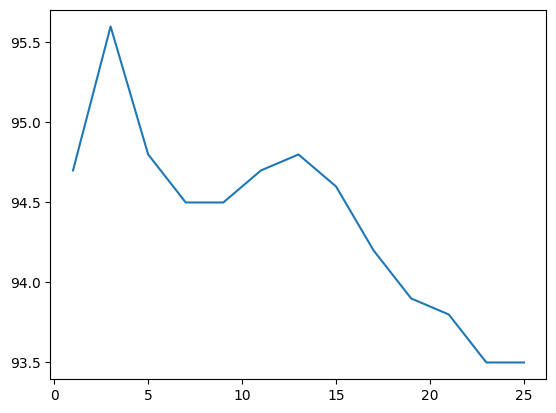

In [29]:
plt.plot(k_values,Acc_List)

In [30]:
max_acc_M = np.max(Acc_List)
opt_k_M = k_values[Acc_List.index(max_acc_M)]

print(f"The Optimized value of K is {opt_k_M}")
print(f"The Validation Accuracy is {max_acc_M}%")

The Optimized value of K is 3
The Validation Accuracy is 95.6%


### Chebyshev Distance

In [31]:
Distance_C = sklearn.metrics.pairwise_distances(Test_np, Train_np, metric = "chebyshev")

In [32]:
col_index = index = [i for i in range(48000)]
Dist_C_df = pd.DataFrame(Distance_C, columns = col_index)
Dist_C_np = Dist_C_df.to_numpy()

In [34]:
PredLabels_C = sorted_labels(Dist_C_np, train_labels) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [35]:
count = 0

for i in k_values:
    
    Pred_labels = knl(PredLabels_C, i)
    acc = accuracy(Actual_Labels, Pred_labels)
    Acc_List[count] = acc
    count+=1

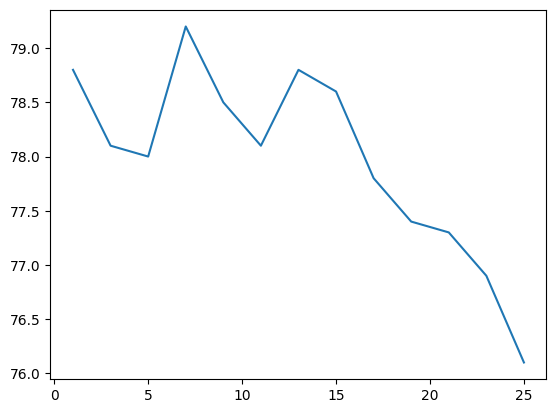

In [36]:
plt.plot(k_values,Acc_List)

In [37]:
max_acc_C = np.max(Acc_List)
opt_k_C = k_values[Acc_List.index(max_acc_C)]

print(f"The Optimized value of K is {opt_k_C}")
print(f"The Validation Accuracy is {max_acc_C}%")

The Optimized value of K is 7
The Validation Accuracy is 79.2%


# Test Dataset

In [38]:
Sample_size = 1000

In [39]:
Actual_Labels = test_labels[0:Sample_size]

In [40]:
col_index = [i for i in range(784)]
row_index = [i for i in range(Sample_size)]

Test_df = pd.DataFrame(te_dataset[0:Sample_size], columns = col_index, index = row_index)
Test_np = Test_df.to_numpy()

### Euclidean Distance 

In [41]:
Distance_E = euclidean_distances(Test_np, Train_np)

In [42]:
col_index = index = [i for i in range(48000)]
Dist_E_df = pd.DataFrame(Distance_E, columns = col_index)
Dist_E_np = Dist_E_df.to_numpy()

In [44]:
PredLabels_E = sorted_labels(Dist_E_np, train_labels)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [45]:
opt_k_E = 1 # This value has been found out through the Validation Dataset but had to be explicitly defined as the Kernel had
            # to be restarted separately for the Test Dataset, due to Space constraints.

Pred_labels = knl(PredLabels_E, opt_k_E)
acc = accuracy(Actual_Labels, Pred_labels)
print(f"The Testing Accuracy is {acc}%")

The Testing Accuracy is 95.5%


In [46]:
pd.crosstab([Actual_Labels], [Pred_labels])

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,84,0,0,0,0,1,0,0,0,0
1,0,125,1,0,0,0,0,0,0,0
2,1,0,109,0,1,0,1,4,0,0
3,0,0,1,100,0,3,0,2,1,0
4,0,1,0,0,103,0,1,0,0,5
5,0,0,0,2,1,84,0,0,0,0
6,1,0,0,0,1,0,85,0,0,0
7,0,2,0,2,1,0,0,93,0,1
8,1,0,0,2,0,3,0,0,82,1


### Manhattan Distance 

In [47]:
Distance_M = manhattan_distances(Test_np, Train_np)

In [48]:
col_index = index = [i for i in range(48000)]
Dist_M_df = pd.DataFrame(Distance_M, columns = col_index)
Dist_M_np = Dist_M_df.to_numpy()

In [49]:
PredLabels_M = sorted_labels(Dist_M_np, train_labels) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [50]:
opt_k_M = 1 # This value has been found out through the Validation Dataset but had to be explicitly defined as the Kernel had
            # to be restarted separately for the Test Dataset, due to Space constraints.
    
Pred_labels = knl(PredLabels_M, opt_k_M)
acc = accuracy(Actual_Labels, Pred_labels)
print(f"The Testing Accuracy is {acc}%")

The Testing Accuracy is 94.39999999999999%


In [51]:
pd.crosstab([Actual_Labels], [Pred_labels])

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,84,0,0,0,0,1,0,0,0,0
1,0,125,1,0,0,0,0,0,0,0
2,2,1,106,0,1,0,1,4,1,0
3,0,0,0,100,0,3,0,2,1,1
4,0,1,0,0,101,0,1,0,0,7
5,0,0,0,2,1,84,0,0,0,0
6,1,0,0,0,1,0,85,0,0,0
7,0,2,0,2,1,0,0,94,0,0
8,2,1,2,1,0,5,0,0,76,2


### Chebyshev Distance

In [52]:
Distance_C = sklearn.metrics.pairwise_distances(Test_np, Train_np, metric = "chebyshev")

In [53]:
col_index = index = [i for i in range(48000)]
Dist_C_df = pd.DataFrame(Distance_C, columns = col_index)
Dist_C_np = Dist_C_df.to_numpy()

In [55]:
PredLabels_C = sorted_labels(Dist_C_np, train_labels) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [56]:
opt_k_C = 1 # This value has been found out through the Validation Dataset but had to be explicitly defined as the Kernel had
            # to be restarted separately for the Test Dataset, due to Space constraints.
    
Pred_labels = knl(PredLabels_C, opt_k_C)
acc = accuracy(Actual_Labels, Pred_labels)
print(f"The Testing Accuracy is {acc}%")

The Testing Accuracy is 78.4%


In [57]:
pd.crosstab([Actual_Labels], [Pred_labels])

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,81,0,0,1,1,0,0,0,1,1
1,0,125,1,0,0,0,0,0,0,0
2,8,1,77,14,0,1,4,2,9,0
3,2,0,2,73,0,7,2,3,18,0
4,2,0,3,2,79,1,3,2,10,8
5,4,2,1,6,2,47,3,3,15,4
6,4,2,2,0,0,5,70,1,3,0
7,0,2,1,1,1,1,2,78,9,4
8,2,0,5,4,0,1,2,0,74,1
